# Lec2: Lab01: Gaussian smoothing (Gaussian blur)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan5_6/Assignment/Tuto/'

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan5_6/Assignment/Tuto


In [ ]:
# import torchvision.transforms.functional as TF
# from PIL import Image
# # image = Image.open(image_path)
# image_PIL = Image.open('../images/cameraman.png')
# # images_ts_PIL = TF.to_tensor(image_PIL)

# # print(image_ts_PIL.shape)

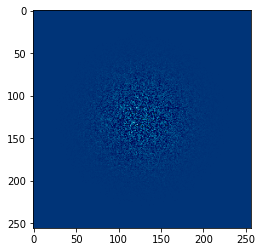

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define 2d gausssian kernel
def gkern(kernlen = 256, std = 128):
  """
  Returns a 2D Gaussian kernel array
  """
  gkern1d = signal.gaussian(kernlen, std = std).reshape(kernlen, 1)
  gkern2d = np.outer(gkern1d, gkern1d) # np.outer: Compute the outer product of two vectors.
  return gkern2d

# Generate random matrix and multiply the kernel by it
A = np.random.randn(256*256).reshape((256, 256))

# Test plot
plt.figure()
X = A*gkern(256, std = 32)
plt.imshow(X, cmap = 'ocean')

In [ ]:
import torch
import numpy as np
def gaussian_fn(M, std):
  n = torch.arange(0,M) -  (M-1.0)/2.0 # gia tri tru di mean (normalizing)
  sig2 = 2*std*std
  w = torch.exp(-n**2/sig2) # he so co the dung ben ngoai
  return w

def gkern(kernlen = 256, std = 128):
  """
  Returns a 2D Gaussian kernel array.
  """
  gkern1d = gaussian_fn(kernlen, std = std)
  gkern2d = torch.outer(gkern1d, gkern1d) # Outer product
  return gkern2d

# Generate random matrix and multiply the kernel by it
A = np.random.rand(256*256).reshape((256, 256))
A = torch.from_numpy(A)
g_filter = gkern(256, std = 32)

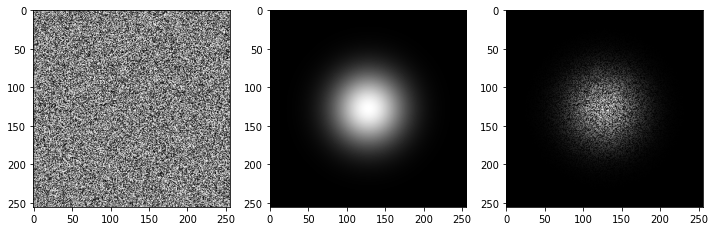

In [ ]:
ax = []
f = plt.figure(figsize = (12,5))
ax.append(f.add_subplot(131))
ax.append(f.add_subplot(132))
ax.append(f.add_subplot(133))
ax[0].imshow(A, cmap = 'gray')
ax[1].imshow(g_filter, cmap = 'gray')
ax[2].imshow(A*g_filter, cmap = 'gray')

In [ ]:
import os
curent = os.getcwd()
print(curent)

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan5_6/Assignment/Tuto


Just checking with images

In [ ]:
import torchvision.transforms.functional as TF
from PIL import Image
# image = Image.open(image_path)
image_PIL = Image.open(curent+'/images/cameraman.png').convert('L')
# image_ts_PIL = TF.to_tensor(image_PIL)

# print(image_ts_PIL.shape)

In [ ]:
A = TF.to_tensor(image_PIL)
# gaussian_filter = gkern(256, std = 32)
g_filter = gkern(256, std = 32)

In [ ]:
g_filter.size()

torch.Size([256, 256])

In [ ]:
out_filt = A*g_filter
out_filt.size()

torch.Size([1, 256, 256])

In [ ]:
A.size()

torch.Size([1, 256, 256])

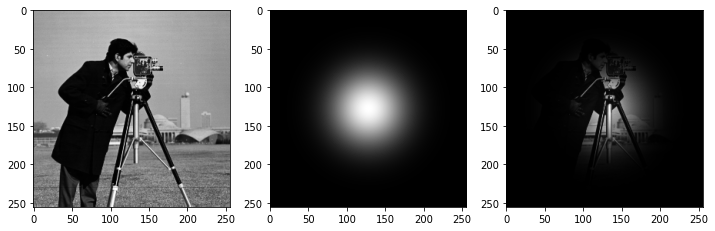

In [ ]:
ax = []
f = plt.figure(figsize = (12,5))
ax.append(f.add_subplot(131))
ax.append(f.add_subplot(132))
ax.append(f.add_subplot(133))
ax[0].imshow(A.permute(1,2,0)[:,:,0], cmap = 'gray')
ax[1].imshow(g_filter, cmap = 'gray')
ax[2].imshow(out_filt.permute(1,2,0)[:,:,0], cmap = 'gray')


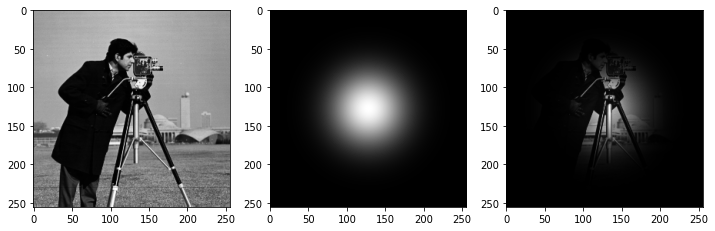

In [ ]:
ax = []
f = plt.figure(figsize = (12,5))
ax.append(f.add_subplot(131))
ax.append(f.add_subplot(132))
ax.append(f.add_subplot(133))
ax[0].imshow(A.permute(1,2,0).squeeze(), cmap = 'gray')
ax[1].imshow(g_filter, cmap = 'gray')
ax[2].imshow(out_filt.permute(1,2,0)[:,:,0], cmap = 'gray')


# Gaussian blurring

## Cach 1: Dung truc tiep PIL's ImageFilter.GaussianBlur transform

In [ ]:
import numbers
import numpy as np
from PIL import ImageFilter

class GaussianSmoothing(object):
  def __init__(self, radius):
      if isinstance(radius, numbers.Number): #kiểm tra xem môt đối tượng (tham số thứ nhất) là một instance hay là một lớp con của Classinfo (tham số thứ hai) (Number)
          self.min_radius = radius
          self.max_radius = radius
      elif isinstance(radius, list):
        if len(radius) != 2:
          raise Exception("'Radius' should be a number or a list of two number")
        if radius[1] < radius[0]:
          raise Exception("radius[0] should be <= radius[1]")
        self.min_radius = radius[0]
        self.max_radius = radius[1]
      else:
        raise Exception("'Radius' should be a number or a list of two number")

  def __call__(self, image):
      radius = np.random.uniform(self.min_radius, self.max_radius)
      return image.filter(ImageFilter.GaussianBlur(radius))

In [ ]:
from PIL import Image
import torchvision.transforms as T

# just add it before ToTensor(), which is ommited here
# transform = T.Compose([
#    GaussianSmoothing([0, 5])
#])

transform = T.Compose([
    GaussianSmoothing([0, 2])
])

# img_t = transform(A)
TEST_IMG = curent + '/images/HUST.jpg'
img = Image.open(TEST_IMG)
img_t = transform(img)

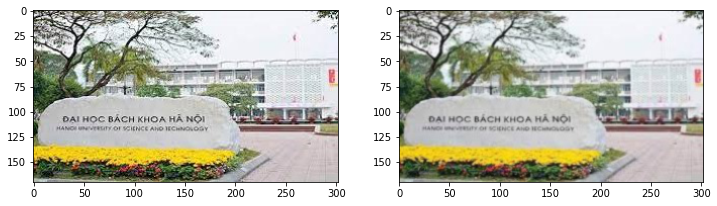

In [50]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
ax[0].imshow(img)
ax[1].imshow(img_t)
# ax[0].imshow(img, cmap='gray')
# ax[1].imshow(img_t, cmap='gray')
plt.show()

## Test with grayscale images

In [53]:
from PIL import Image
import torchvision.transforms as T
transform = T.Compose([
    GaussianSmoothing([0, 2])
])
test_img = A
img_t = transform(image_PIL)

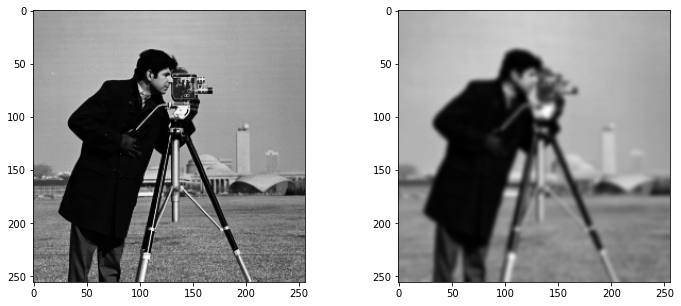

In [56]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
ax[0].imshow(A.squeeze(), cmap='gray')
ax[1].imshow(img_t, cmap='gray')

In [58]:
# from PIL import Image
# import torchvision.transforms as T

# just add it before ToTensor(), which is ommited here 
# transform = T.Compose([
#     GaussianSmoothing([0, 5])
# ]) 
transform = T.Compose([
    GaussianSmoothing([0, 3])
]) 
TEST_IMG = curent + "/images/img_noise.jpg"
# TEST_IMG = "../images/noisy2.png"

# TEST_IMG = "../images/HUST.jpg"
img = Image.open(TEST_IMG)
img_t = transform(img)


In [59]:
img.size

(289, 276)

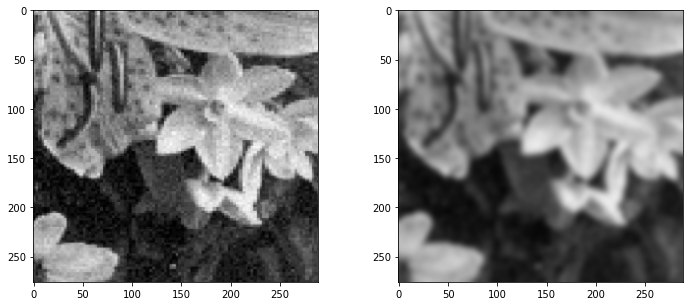

In [60]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_t, cmap='gray')

In [61]:
import cv2
import numpy as np

img_org = cv2.imread(curent + '/images/noisy2.png')
img = cv2.resize(img_org, (256, 256), interpolation = cv2.INTER_CUBIC)
print(img_org.shape, img.shape)

(200, 201, 3) (256, 256, 3)


In [63]:
cv2.imwrite(curent+'/images/noisy2_resize.png',img)
TEST_IMG = curent + '/images/noisy2_resize.png'
img = Image.open(TEST_IMG)
img_t = transform(img)

Text(0.5, 1.0, 'Sau Gaussian smoothing')

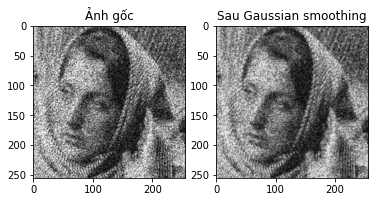

In [66]:
plt.figure
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(122)
plt.imshow(img_t, cmap='gray')
plt.title('Sau Gaussian smoothing')

## Cach 2: Gaussian blurring voi custom function

In [71]:
from posixpath import dirname
import math
import numbers
import torch
from torch import nn
from torch.nn import functional as F

class GaussianSmoothing_custom(nn.Module):
  """
  Apply gaussian smoothing on a
  1d, 2d or 3d tensor. Filter is performed seperately for each channel
  in the input using a depthwis convolution
  Arguments:
    channels (int, sequence): Number of channels of the input tensors.
      Output havt this number of channels as well
      kernel_size (int, sequence): Size of the gaussian kernel
      sigma (float, sequence): Standard deviation of the gaussian kernel.
      dim (int, optional): the number of dimensions of the data
        Default value is 2 (spatial)
  """

  def __init__(self, channels, kernel_size, sigma, dim = 2):
      super(GaussianSmoothing_custom, self).__init__()
      if isinstance(kernel_size, numbers.Number):
          kernel_size = [kernel_size] * dim
      if isinstance(sigma, numbers.Number):
          sigma = [sigma] * dim

      # The gaussian kernel is the product of the gaussian function of each dimension.
      kernel = 1
      meshgrids = torch.meshgrid(
        [
            torch.arange(size, dtype = torch.float32)
            for size in kernel_size
        ]
      )
      for size, std, mgrid in zip(kernel_size, sigma, meshgrids):
          mean = (size-1)/2
          kernel *= 1/(std*math.sqrt(2 * math.pi))*torch.exp(-((mgrid-mean)/std)**2/2)

      # make sure sum of values in gaussian kernel equals 1.
      kernel = kernel / torch.sum(kernel)
      # reshape to depthwise convolutional weight
      kernel = kernel.view(1, 1, *kernel.size())
      kernel = kernel.repeat(channels, *[1] * (kernel.dim()-1))

      self.register_buffer('weight', kernel)
      self.groups = channels

      if dim == 1:
          self.conv = F.conv1d
      elif dim == 2:
          self.conv = F.conv2d
      elif dim == 3:
          self.conv = F.conv3d
      else:
          raise RuntimeError(
                'Only 1, 2 and 3 dimensions are supported. Received {}.'.format(dim)
        )

  def forward(self, input):
      """
          Apply gaussian filter to input
          Arguments:
            input (torch.Tensor): Input to apply gaussian filter on
          Returns:
            filtered (torch.Tensor): Filtered output.
      """
      return self.conv(input, weight = self.weight, groups = self.groups)

# Vi du cach su dung
smoothing = GaussianSmoothing_custom(3, 5, 1)
input = torch.rand(1, 3, 100, 100)
input = F.pad(input, (2,2,2,2), mode = 'reflect')
output = smoothing(input)

In [74]:
from PIL import Image
import torchvision.transforms as T
import torchvision.transforms.functional as TF

transform_1 = T.Compose([
    GaussianSmoothing_custom(3, 5, 1)
])

test_img = curent + '/images/HUST.jpg'
img = Image.open(test_img)
image_ts_PIL = TF.to_tensor(img)
image_ts_PIL.size()
img1 = image_ts_PIL.unsqueeze(0)
# img1.size()
# input = img1
input = F.pad(img1, (2,2,2,2), mode = 'reflect')
# output = smoothing(input)
# output.size()

img_t = transform_1(input)

In [75]:
img_t.size()

torch.Size([1, 3, 170, 302])

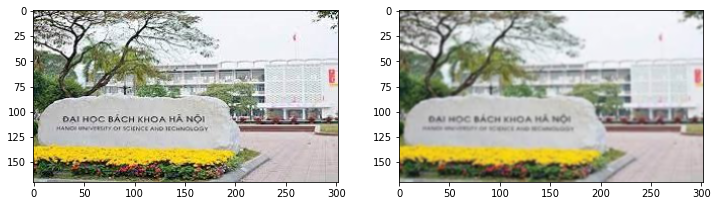

In [76]:
import matplotlib.pyplot as plt
ax = []
f = plt.figure(figsize = (12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
ax[0].imshow(img)
ax[1].imshow(img_t.permute(2,3,1,0)[:,:,:,0])

### Vi du voi anh nhieu

In [77]:
TEST_IMG = curent + '/images/noisy2_resize.png'
img = Image.open(TEST_IMG)
# img_t = transform(img)

image_ts_PIL = TF.to_tensor(img)
image_ts_PIL.size()
img1 = image_ts_PIL.unsqueeze(0)
# img1.size()
# input=img1
input = F.pad(img1, (2, 2, 2, 2), mode = 'reflect')

In [78]:
transform_2 = T.Compose([
    GaussianSmoothing_custom(3, 5, 7)
])
img_t = transform_2(input)


Text(0.5, 1.0, 'Sau Gaussian smoothing')

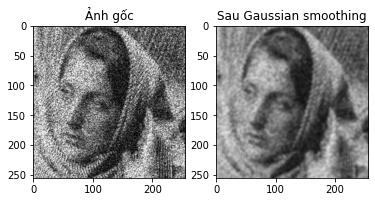

In [79]:
plt.figure
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(122)
plt.imshow(img_t.permute(2,3,1,0)[:,:,:,0], cmap='gray')
plt.title('Sau Gaussian smoothing')

## Thu voi anh khac

In [82]:
img = Image.open(curent+'/images/img_noise.jpg')

image_ts_PIL = TF.to_tensor(img)
image_ts_PIL.size()
img1 = image_ts_PIL.unsqueeze(0)
input = F.pad(img1, (2,2,2,2), mode = 'reflect')
trans = T.Compose([
    GaussianSmoothing_custom(3, 3, 5) # ker_size = 3, sigma = 5
])
img_t = trans(input)

Text(0.5, 1.0, 'Sau Gaussian smoothing')

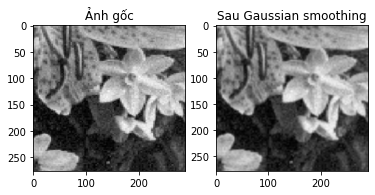

In [83]:
plt.figure
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(122)
plt.imshow(img_t.permute(2,3,1,0)[:,:,:,0], cmap='gray')
plt.title('Sau Gaussian smoothing')